In [1]:
from preamble import *
%matplotlib inline
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import rc

font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from sklearn.model_selection import train_test_split

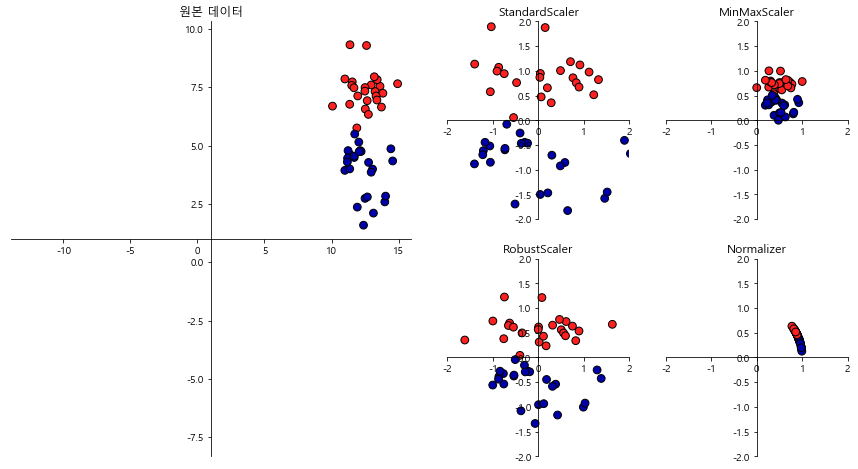

In [2]:
mglearn.plots.plot_scaling()

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [5]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다.
print("변환된 후 크기: {}".format(X_train_scaled.shape))
print("스케일 조정 전 특성별 최솟값:\n{}".format(X_train.min(axis=0)))
print("스케일 조정 전 특성별 최댓값:\n{}".format(X_train.max(axis=0)))
print("스케일 조정 후 특성별 최솟값:\n{}".format(X_train_scaled.min(axis=0)))
print("스케일 조정 전 특성별 최댓값:\n{}".format(X_train_scaled.max(axis=0)))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최솟값:
[  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
스케일 조정 전 특성별 최댓값:
[  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]
스케일 조정 후 특성별 최솟값:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 전 특성별 최댓값:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다.
print("스케일 조정 후 특성별 최솟값:\n{}".format(X_test_scaled.min(axis=0)))
print("스케일 조정 전 특성별 최댓값:\n{}".format(X_test_scaled.max(axis=0)))

# 놀랍게도 스케일을 조정한 테스트 세트의 최소값과 최대값이 0과 1이 아니다.
# --> 상항 훈련 세트와 테스트 세트에 같은 변환을 적용해야 한다.

스케일 조정 후 특성별 최솟값:
[ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]
스케일 조정 전 특성별 최댓값:
[0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498
 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745
 0.915 1.132 1.07  0.924 1.205 1.631]


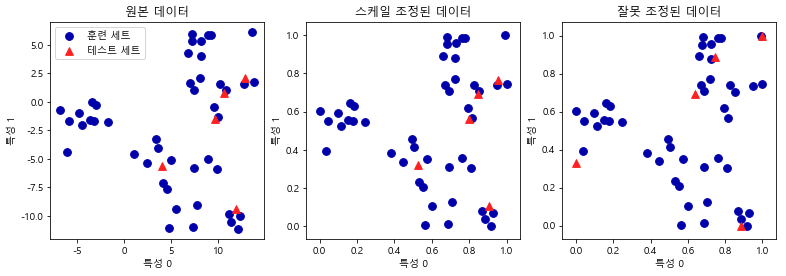

In [8]:
# 3.3.3 훈련 데이터와 데스트 데이터의 스케일을 같은 방법으로 조정하기
# 테스트 세트에서의 최솟값과 범위를 이용할 때 발생하는 일
from sklearn.datasets import make_blobs
# 인위적인 데이터 셋 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도를 그린다.
fig, axes = plt.subplots(1,3, figsize=(13,4))
axes[0].scatter(X_train[:,0],X_train[:,1], c=mglearn.cm2(0), label="훈련 세트", s=60)
axes[0].scatter(X_test[:,0],X_test[:,1], marker='^',c=mglearn.cm2(1), label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler를 사용해 스케일을 조정한다.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그린다.
axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1], c=mglearn.cm2(0), label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1], marker='^',c=mglearn.cm2(1), label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정한다.
# 테스트 세트의 최솟값은 0, 최대값은 1이 된다.
# 이는 예제를 위한 것으로, 절대로 이렇게 해서는 안된다.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그린다.
axes[2].scatter(X_train_scaled[:,0],X_train_scaled[:,1], c=mglearn.cm2(0), label="훈련 세트", s=60)
axes[2].scatter(X_test_scaled_badly[:,0],X_test_scaled_badly[:,1], marker='^',c=mglearn.cm2(1), label="테스트 세트", s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 메서드 chaining을 사용하여 fit과 transform을 연달아 호출합니다.
X_scaled = scaler.fit(X_train).transform(X_train)
# 위와 동일하지만 더 효율적.
X_scaled_d = scaler.fit_transform(X_train)

In [10]:
# 3.3.4 지도 학습에서의 데이터 전처리 효과
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test,y_test)))

테스트 세트 정확도: 0.63


In [11]:
# SVC 모델을 학습시키기 전에 MinMaxScaler를 사용해 데이터의 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 데스트 세트의 정확도
print("스케일 조정된 테스트 세트 정확도: {:.2f}".format(svm.score(X_test_scaled,y_test)))

스케일 조정된 테스트 세트 정확도: 0.97


In [12]:
# 평균 0, 분산 1을 갖도록 스케일 조정
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 데스트 세트의 정확도
print("svm 테스트 세트 정확도: {:.2f}".format(svm.score(X_test_scaled,y_test)))

svm 테스트 세트 정확도: 0.96


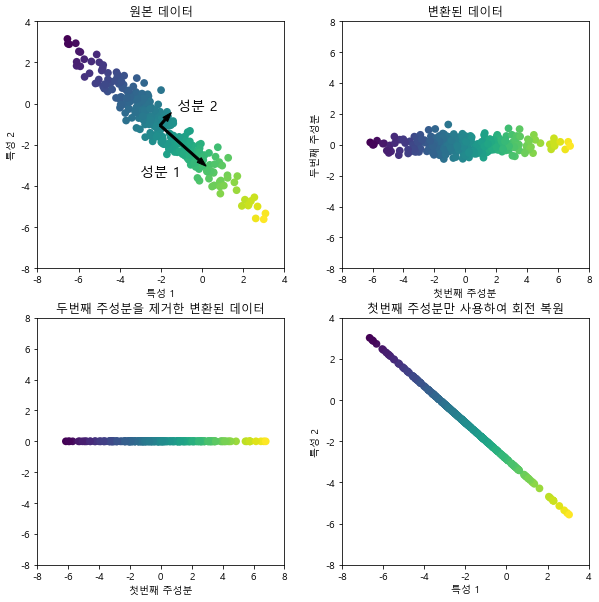

In [13]:
# 차원 축소, 특성 추출, 매니폴드 학습
mglearn.plots.plot_pca_illustration()

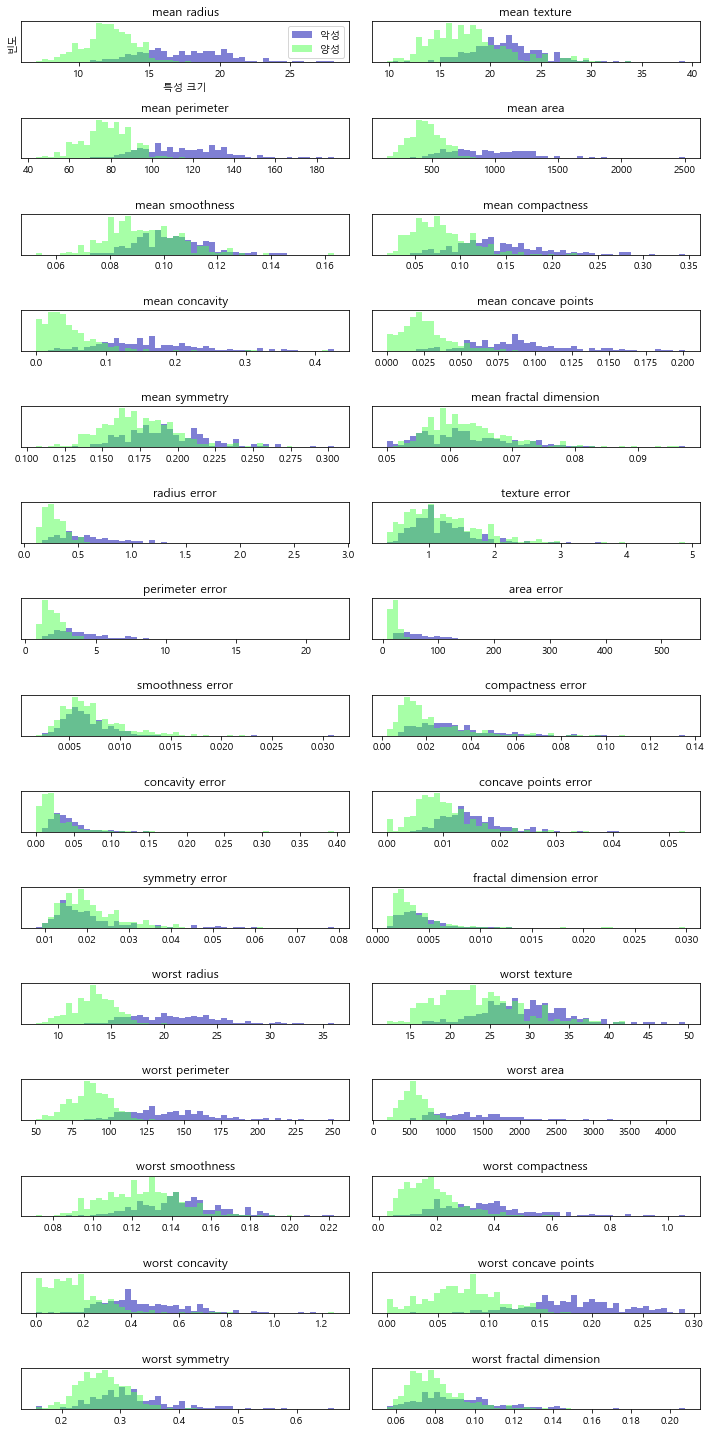

In [21]:
fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

In [23]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [24]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개의 주성분만 유지
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델 생성
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0,0.5,'두 번재 주성분')

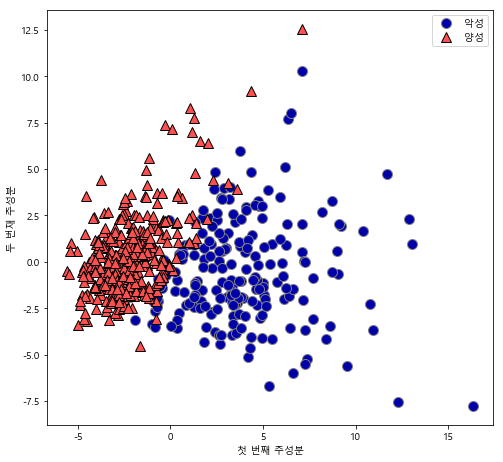

In [25]:
# 클래스를 색깔로 구분하여 처음 두개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번재 주성분")

In [27]:
print("PCA 주성분 형태: {}".format(pca.components_.shape))

PCA 주성분 형태: (2, 30)


In [28]:
print("PCA 주성분\n{}".format(pca.components_))

PCA 주성분
[[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


Text(0,0.5,'주성분')

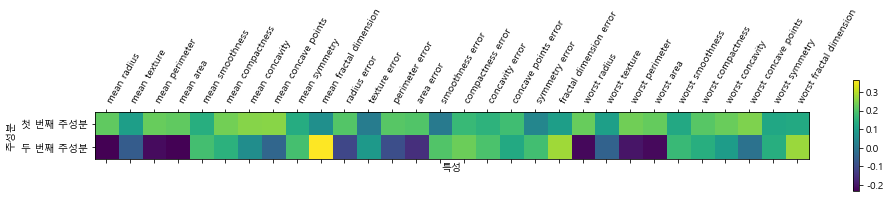

In [35]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

In [ ]:
# 고유얼굴(eigneface) 특성 추출 (p187)